In [1]:
"""Analyse relationships between items in the average_first_pulse_fit table 
"""

from multipatch_analysis.database import database as db
from multipatch_analysis.first_pulse_fits_average import AvgFirstPulseFitsForceSign 
#from multipatch_analysis.database.database import TableGroup
import multipatch_analysis.connection_strength as cs 
import pandas as pd
import seaborn as sns

60


In [5]:
#THIS DOES QUERY, EXTRACTS DATA, AND SAVES IN A CSV.
'''Note that this query can take several minutes'''
data_dict= {'uid':[],
            'pre_cell_id':[],
            'post_cell_id':[],
            'pre_cre':[],
            'post_cre':[],
            'amp':[], 
            'NRMSE':[], 
            'decay_tau':[], 
            'latency':[], 
            'rise_time':[], 
            'syn_excitation':[],
            'distance':[],
            'boolean_connection':[],
            'acsf':[],
            'measured_amp':[],
            'measured_baseline':[]}

session=db.Session()
data=session.query(AvgFirstPulseFitsForceSign, db.Pair).join(db.Pair).all()
# extract the relevant data from the query
for afpf, pair in data:
    #stuff from average_first_pulse_fit table
    data_dict['uid'].append(afpf.__dict__['uid'])
    data_dict['pre_cell_id'].append(afpf.__dict__['pre_cell_id'])
    data_dict['post_cell_id'].append(afpf.__dict__['post_cell_id'])
    data_dict['amp'].append(afpf.__dict__['amp'])
    data_dict['NRMSE'].append(afpf.__dict__['NRMSE'])
    data_dict['decay_tau'].append(afpf.__dict__['decay_tau'])
    data_dict['rise_time'].append(afpf.__dict__['rise_time'])
    data_dict['latency'].append(afpf.__dict__['latency'])
    data_dict['boolean_connection'].append(afpf.__dict__['connected'])
    data_dict['syn_excitation'].append(afpf.__dict__['synapse_sign'])
    data_dict['measured_amp'].append(afpf.__dict__['measured_amp'])
    data_dict['measured_baseline'].append(afpf.__dict__['measured_baseline'])
    #stuff from pair table
    data_dict['pre_cre'].append(pair.pre_cell.cre_type)
    data_dict['post_cre'].append(pair.post_cell.cre_type)
    data_dict['distance'].append(pair.distance)
    data_dict['acsf'].append(pair.experiment.acsf)
session.close()
df=pd.DataFrame(data_dict)
df.to_csv('average_fit_forced_sign_9_26_18.csv')

In [ ]:
# #Note this is for old table and can be depricated when new tables are made
# class FirstPulseFitTableGroup(TableGroup):
#     """Fits first pulse for each individual sweeps.
#     """
#     schemas = {

#         'average_first_pulse_fit': [
#             """Contains results of psp_fit on spike aligned, average first pulse PSP for each
#             connection that passed qc in current clamp. Created via first_pulse_fits_average.py.
#              All units in SI.""",
#             ('pair_id', 'pair.id', '', {'index': True}),
#             ('uid', 'float','timestamp attached to the experiment for ease of viewing'),
#             ('amp', 'float', 'amplitude '),
#             ('latency', 'float', 'time elapsed since the time of presynaptic spike (max dv/dt)'),
#             ('rise_time', 'float', 'rise time of psp', ),
#             ('decay_tau', 'float', 'decay of psp'),
#             ('avg_psp', 'array', 'array of the best fit voltage waveform starting 10 ms before pre-synaptic spike'),
#             ('dt', 'float', 'time step of *avg_psp* array'),
#             ('n_sweeps', 'int', 'number of sweeps used in the fit'),
#             ('pulse_ids', 'object', 'data base pulse ids included in fit'),
#             ('distance', 'float', 'distance between pairs'),
#             ('NRMSE', 'float', 'error of fit')]
#          } 
    
#     def create_mappings(self):
#         TableGroup.create_mappings(self)
        
# #        IndividualFirstPulseFits = self['individual_first_pulse_fit']
#         AverageFirstPulseFits = self['average_first_pulse_fit']

#         db.Pair.average_first_pulse_fit = db.relationship(AverageFirstPulseFits, back_populates="pair", cascade="delete",
#                                                       single_parent=True, uselist=False)
#         AverageFirstPulseFits.pair = db.relationship(db.Pair, back_populates="average_first_pulse_fit", single_parent=True)

# first_pulse_fit_tables = FirstPulseFitTableGroup()

# def init_tables():
#     global AverageFirstPulseFits
#     first_pulse_fit_tables.create_tables()

#     AverageFirstPulseFits = first_pulse_fit_tables['average_first_pulse_fit']

# # create tables in database and add global variables for ORM classes
# init_tables()

# #THIS DOES QUERY, EXTRACTS DATA, AND SAVES IN A CSV.
# '''Note that this query can take several minutes'''
# data_dict={'amp':[], 
#             'NRMSE':[], 
#             'decay_tau':[], 
#             'latency':[], 
#             'rise_time':[], 
#             'pre_cre':[],
#             'post_cre':[],
#             'syn_excitation':[],
#             'distance':[],
#             'boolean_connection':[],
#             'acsf':[],
#             }

# session=db.Session()
# data=session.query(AverageFirstPulseFits, db.Pair).join(db.Pair).all()
# # extract the relevant data from the query
# for afpf, pair in data:
#     #stuff from average_first_pulse_fit table
#     data_dict['amp'].append(afpf.__dict__['amp'])
#     data_dict['NRMSE'].append(afpf.__dict__['NRMSE'])
#     data_dict['decay_tau'].append(afpf.__dict__['decay_tau'])
#     data_dict['rise_time'].append(afpf.__dict__['rise_time'])
#     data_dict['latency'].append(afpf.__dict__['latency'])

#     #stuff from pair table
#     data_dict['pre_cre'].append(pair.pre_cell.cre_type)
#     data_dict['post_cre'].append(pair.post_cell.cre_type)
#     data_dict['syn_excitation'].append(pair.connection_strength.synapse_type)
#     data_dict['distance'].append(pair.distance)
#     data_dict['boolean_connection'].append(pair.synapse)
#     data_dict['acsf'].append(pair.experiment.acsf)
# session.close()
# df=pd.DataFrame(data_dict)
# df.to_csv('average_fit9_26_18.csv')

In [6]:
#load data from csv created from query and data extraction above
df=pd.read_csv('average_fit_forced_sign_9_26_18.csv')

In [ ]:
sns.set()
sns.lmplot(x="NRMSE", y="distance", hue="syn_excitation", data=df)
sns.lmplot(x="NRMSE", y="latency", hue="syn_excitation", data=df)
sns.lmplot(x="NRMSE", y="decay_tau", hue="syn_excitation", data=df)
sns.lmplot(x="NRMSE", y="rise_time", hue="syn_excitation", data=df)
sns.lmplot(x="NRMSE", y="amp", hue="syn_excitation", data=df)



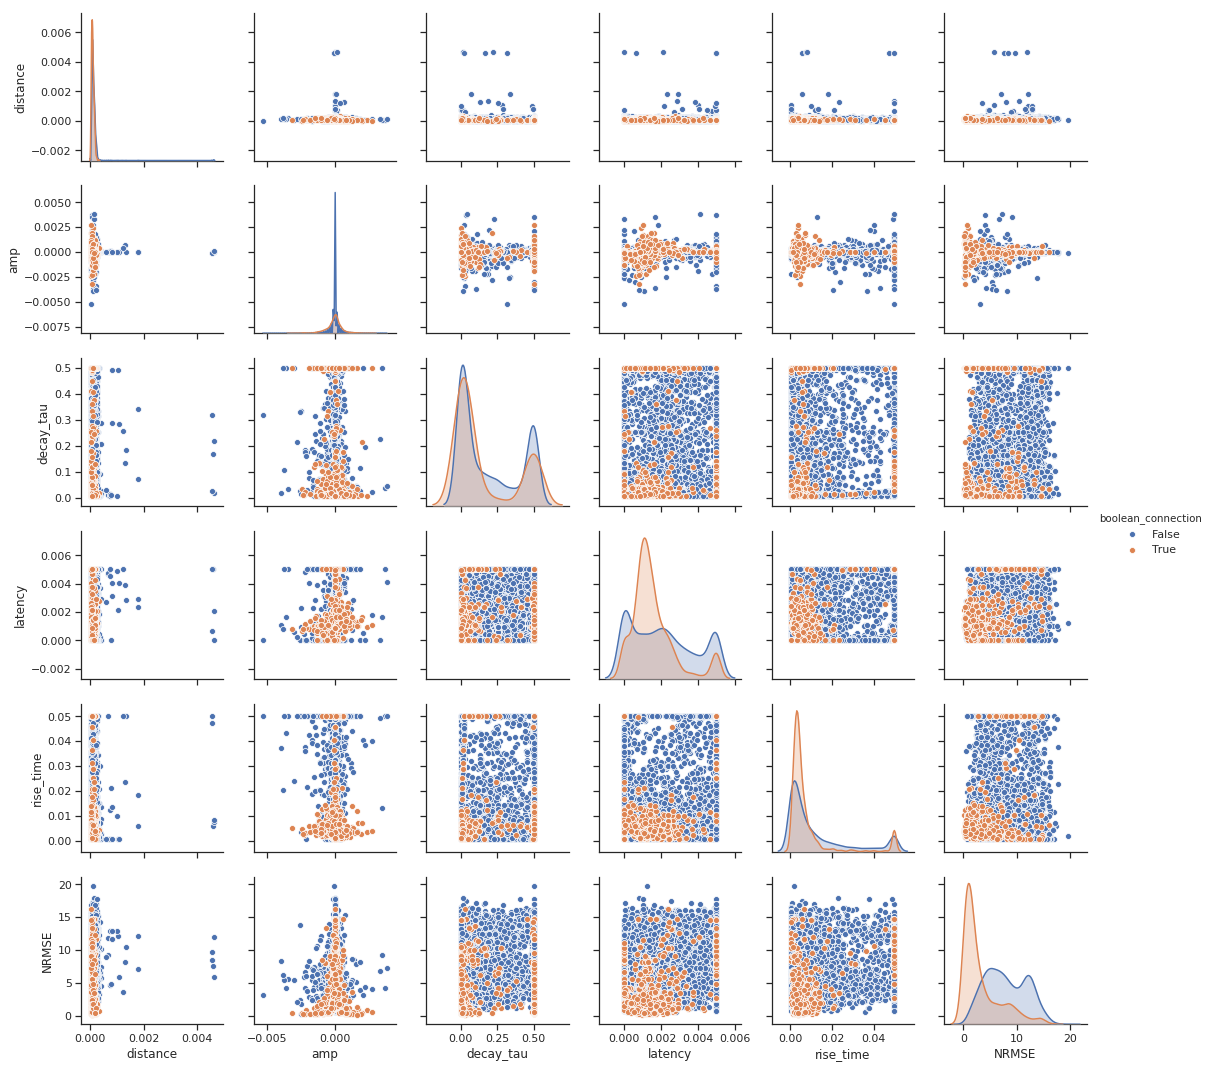

In [7]:
plotting_df=df[df.distance<1e10]
sns.set(style="ticks")
sns.pairplot(plotting_df, vars=['distance','amp','decay_tau', 'latency', 'rise_time', 'NRMSE'], hue='boolean_connection')

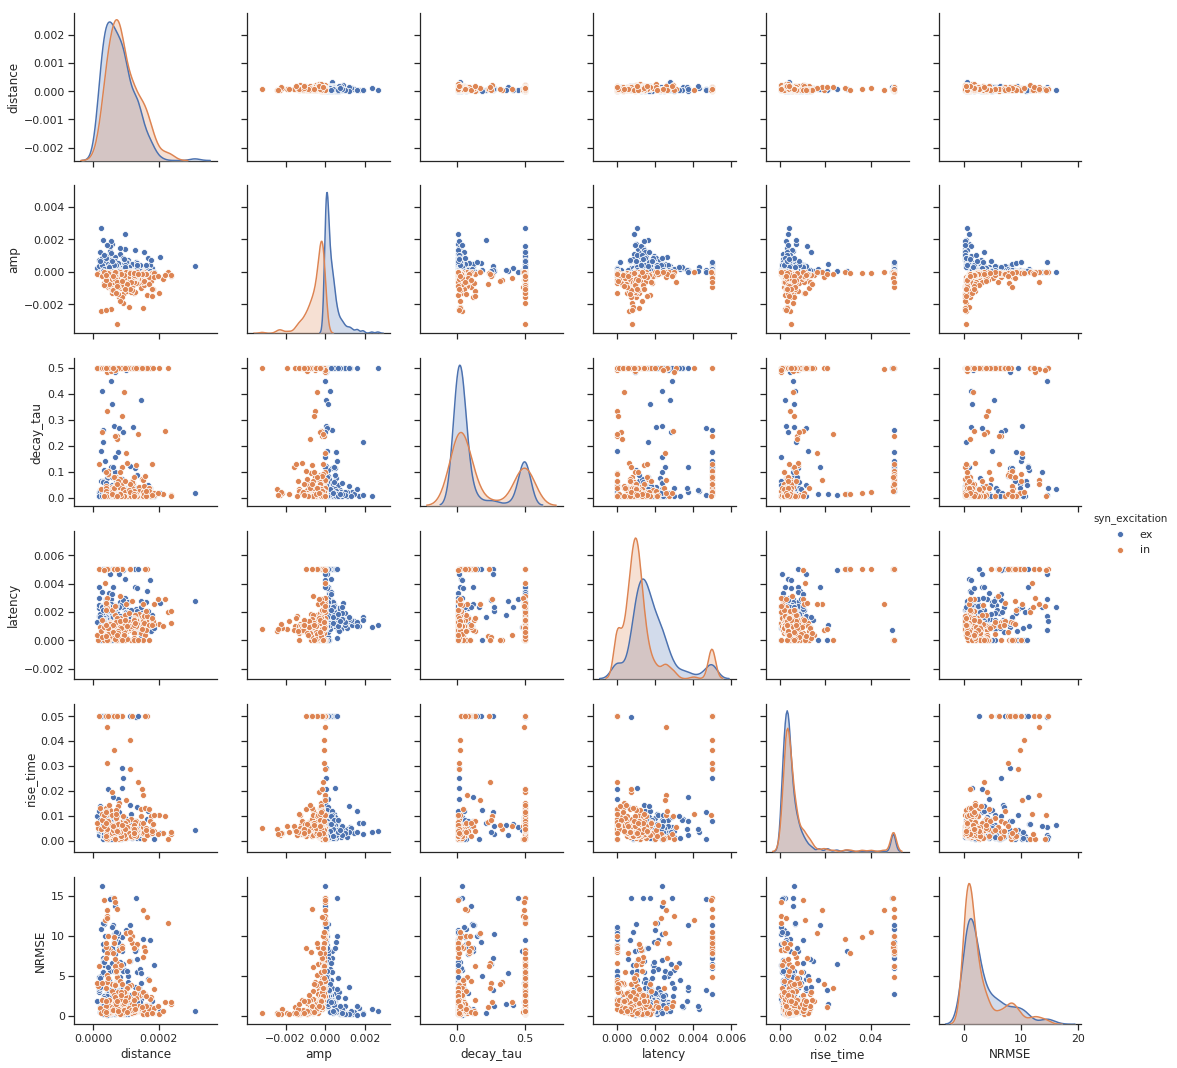

In [8]:
plotting_df=df[(df.distance<1e10) & (df.boolean_connection==True)]
sns.set(style="ticks")
sns.pairplot(plotting_df, 
             vars=['distance','amp','decay_tau', 'latency', 'rise_time', 'NRMSE'], 
             hue='syn_excitation')

In [ ]:
plotting_df=df[(df.distance<1e10) & (df.boolean_connection==True)]
sns.set(style="ticks")
sns.pairplot(plotting_df, 
             vars=['distance','amp','decay_tau', 'latency', 'rise_time', 'NRMSE'], 
             hue='acsf')


In [ ]:
plotting_df=df[(df.distance<1e10) & (df.boolean_connection==True) & (df.NRMSE<8)]
sns.set(style="ticks")
sns.pairplot(plotting_df, vars=['distance','amp','decay_tau', 'latency', 'rise_time', 'NRMSE'], hue='syn_excitation')
